## Observations and Insights

## Dependencies and starter code

In [41]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as linregress
import numpy as np
from sklearn import datasets
import seaborn as sns

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)



## Summary statistics

In [2]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
mouse_metadata.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [3]:
study_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [4]:
#merge data frames to merged_mouse_study on an Mouse ID, outer join
merged_mouse_study = pd.merge(mouse_metadata, study_results, on="Mouse ID", how="outer")
merged_mouse_study.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [5]:
#sort merged_mouse_study on Tumor Volume (mm3)
merged_mouse_study = merged_mouse_study.sort_values(["Tumor Volume (mm3)"], ascending = True)
merged_mouse_study.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
9,k403,Ramicane,Male,21,16,45,22.050126,1
19,s185,Capomulin,Female,3,17,45,23.343598,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
18,s185,Capomulin,Female,3,17,40,25.472143,1
7,k403,Ramicane,Male,21,16,35,26.546993,1


In [6]:
#calculate total, mean, median, variance, stdev, st error for summary stats table
grouped_drug_regimen = merged_mouse_study.groupby(["Drug Regimen"])
#calculate mean tumor volumes across drug regimens
grouped_drug_regimen_mean = grouped_drug_regimen["Tumor Volume (mm3)"].mean()
grouped_drug_regimen_mean
#calculate median tumor volumes
grouped_drug_regimen_median= grouped_drug_regimen["Tumor Volume (mm3)"].median()
grouped_drug_regimen_median
#calculate variance in tumor volumes across drug regimens
grouped_drug_regimen_var= grouped_drug_regimen["Tumor Volume (mm3)"].var()
grouped_drug_regimen_var
#calculate stdev in tumor volumes across drug regimens
grouped_drug_regimen_std= grouped_drug_regimen["Tumor Volume (mm3)"].std()
grouped_drug_regimen_std
#calculate standard error in tumor volumes across drug regimens
grouped_drug_regimen_sem= grouped_drug_regimen["Tumor Volume (mm3)"].sem()
grouped_drug_regimen_sem
#create summary table df for above calculations across drug regimens
study_summary_stats = pd.DataFrame({"Mean": grouped_drug_regimen_mean, 
                                    "Median": grouped_drug_regimen_median, "Variance": grouped_drug_regimen_var, 
                                    "Standard Deviation": grouped_drug_regimen_std, "Standard Error": grouped_drug_regimen_sem})

study_summary_stats

,Mean,Median,Variance,Standard Deviation,Standard Error
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [7]:
#group drug regimen and mouse id to get data points for bar plots
treatment_regimen_data = merged_mouse_study.groupby(["Drug Regimen"]).count()["Mouse ID"]
treatment_regimen_data

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     161
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Mouse ID, dtype: int64

## Bar plots

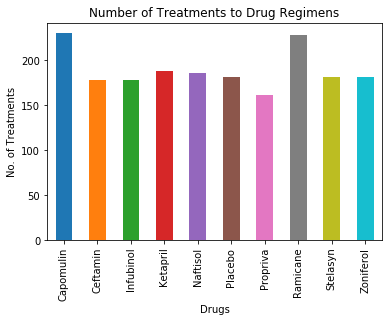

In [8]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas
treatment_regimen_data.plot(kind = "bar")
#set figure labels
plt.title("Number of Treatments to Drug Regimens")
plt.xlabel("Drugs")
plt.ylabel("No. of Treatments")
#show figrue 
plt.show()

Text(0, 0.5, 'No. of Treatments')

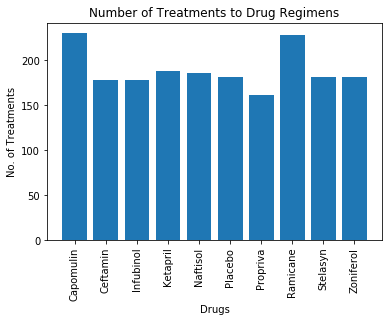

In [9]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot
number_of_treatments = [230, 178, 178, 188, 186, 181, 161, 228, 181, 182]
#set figure axis and tick locations
x_axis = np.arange(len(treatment_regimen_data))
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ['Capomulin', 'Ceftamin', 'Infubinol', 
                            'Ketapril', 'Naftisol', 'Placebo', 
                            'Propriva', 'Ramicane', 'Stelasyn', 
                            'Zoniferol'],  rotation = 'vertical')
#set x and y data in figure
plt.bar(x_axis, number_of_treatments, align='center')
#set figure title and labels
plt.title("Number of Treatments to Drug Regimens")
plt.xlabel("Drugs")
plt.ylabel("No. of Treatments")

## Pie plots

In [10]:
#group Mouse ID and sex to find number of female and male mice
grouped_gender = merged_mouse_study.groupby(["Mouse ID", "Sex"])
#create grouped df
grouped_gender_df = pd.DataFrame(grouped_gender.size())
#create df with female and male mouse counts
gender_analysis = pd.DataFrame(grouped_gender_df.groupby(["Sex"]).count())
gender_analysis.columns=["Total Count"]
gender_analysis.head()
#calculate % for female and male mice for pie chart
gender_analysis["Percent"] =(100*(gender_analysis["Total Count"]/gender_analysis["Total Count"].sum()))
gender_analysis["Percent"]=gender_analysis["Percent"]
gender_analysis
#format gender_analysis with% and 2 decimal points
#gender_analysis.style.format({"Percent": '{:.2%}'})

,Total Count,Percent
Sex,,
Female,124,49.799197
Male,125,50.200803


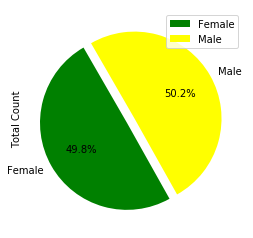

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
colors = ["green", "yellow"]
explode = (0.1,0)
gender_analysis.plot.pie(y="Total Count", explode=explode, colors=colors, 
                         autopct="%1.1f%%", shadow=False, startangle=120)
                                        


([<matplotlib.patches.Wedge at 0x1a24d93ef0>,
 [Text(-1.0429948112336984, -0.5934322402259434, 'Female'),
  Text(0.9560785769642237, 0.543979553540448, 'Male')],
 [Text(-0.608413639886324, -0.346168806798467, '49.8%'),
  Text(0.5214974056168492, 0.2967161201129716, '50.2%')])

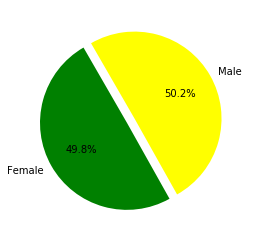

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
#create labels for pie plot
labels = ["Female", "Male"]
percents = [49.799197, 50.200803]
plt.pie(percents, explode=explode, labels =labels,
        colors=colors, autopct="%1.1f%%", shadow=False, startangle=120)

## Quartiles, outliers and boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers.

# data to include "Capomulin", "Ramicane", "Infubinol", "Ceftamin" drugs to be analyzed 
drug_regimes=merged_mouse_study[merged_mouse_study["Drug Regimen"].isin(["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])]
drug_regimes=drug_regimes.sort_values(["Timepoint"], ascending = True)
drug_regimes
#only to include "Drug Regimen", "Mouse ID", "Timepoint" and "Tumor Volume (mm3)"
drug_regimes_cleaned = drug_regimes[["Drug Regimen", "Mouse ID", "Timepoint" and "Tumor Volume (mm3)"]]
drug_regimes_cleaned
#group data by "Drug Regimen" and "Mouse ID" and find the last tumor vol measurement using .last
sorted_drug_regimes = drug_regimes_cleaned.groupby(["Drug Regimen", "Mouse ID"]).last()["Tumor Volume (mm3)"]
sorted_drug_regimes.head()
#create sorted_drug_regimes_df 
sorted_drug_regimes_df = sorted_drug_regimes.to_frame()
sorted_drug_regimes_df

Tumor Volume (mm3)
Drug Regimen Mouse ID                    
Capomulin    b128               38.982878
             b742               38.939633
             f966               30.485985
             g288               37.074024
             g316               40.159220
             i557               47.685963
             i738               37.311846
             j119               38.125164
             j246               38.753265
             l509               41.483008
             l897               38.846876
             m601               28.430964
             m957               33.329098
             r157               46.539206
             r554               32.377357
             r944               41.581521
             s185               23.343598
             s710               40.728578
             t565               34.455298
             u364               31.023923
             v923               40.658124
             w150               39.952347
             w914               36.041047
             x401               28.484033
             y793               31.896238
Ceftamin     a275               62.999356
             b447               45.000000
             b487               56.057749
             b759               55.742829
             f436               48.722078
...                                   ...
Infubinol    v766               51.542431
             w193               50.005138
             w584               58.268442
             y163               67.685569
             z581               62.754451
Ramicane     a411               38.407618
             a444               43.047543
             a520               38.810366
             a644               32.978522
             c458               38.342008
             c758               33.397653
             d251               37.311236
             e662               40.659006
             g791               29.128472
             i177               33.562402
             i334               36.374510
             j913               31.560470
             j989               36.134852
             k403               22.050126
             m546               30.564625
             n364               31.095335
             q597               45.220869
             q610               36.561652
             r811               37.225650
             r921               43.419381
             s508               30.276232
             u196               40.667713
             w678               43.166373
             y449               44.183451
             z578               30.638696

[100 rows x 1 columns]

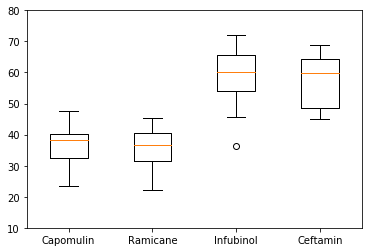

In [14]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
#create a list of four drug regimes used in study ("Capomulin", "Ramicane", "Infubinol", "Ceftamin")
four_regimes = ['Capomulin', 'Ramicane', 'Infubinol','Ceftamin']
boxplot_df = sorted_drug_regimes_df.reset_index()
boxplot_list = boxplot_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].apply(list)
boxplot_list_df = pd.DataFrame(boxplot_list)
boxplot_list_df= boxplot_list_df.reindex(four_regimes)
final_tumor_vols = [vol for vol in boxplot_list_df['Tumor Volume (mm3)']]
plt.boxplot(final_tumor_vols, labels=four_regimes)
plt.ylim(10, 80)
plt.show()


## Line and scatter plots

Text(0, 0.5, 'Last Tumor Vol (mm3) Measurement')

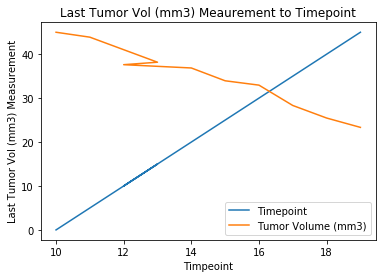

In [23]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
time_to_tumor = merged_mouse_study[merged_mouse_study["Mouse ID"].isin(["s185"])]
time_to_tumor

time_to_tumor_data = time_to_tumor[["Mouse ID", "Timepoint", "Tumor Volume (mm3)"]]
time_to_tumor_data

time_to_tumor_fig = time_to_tumor_data.reset_index()
time_to_tumor_fig

time_tumor_plot = time_to_tumor_data[["Mouse ID", "Timepoint", "Tumor Volume (mm3)"]]
time_tumor_plot.plot.line()
plt.title("Last Tumor Vol (mm3) Meaurement to Timepoint")
plt.xlabel("Timpeoint")
plt.ylabel("Last Tumor Vol (mm3) Measurement")

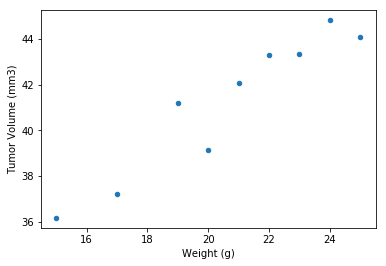

In [60]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
scatter_capomulin = merged_mouse_study[merged_mouse_study["Drug Regimen"].isin(["Capomulin"])]
capomulin_df = drug_regimes[["Mouse ID","Weight (g)", "Tumor Volume (mm3)"]]
#sort by weight (g) and ascend true
capomulin_sorted = scatter_capomulin.sort_values(["Weight (g)"], ascending=True)
capomulin_plot = scatter_capomulin.reset_index()
#group data by avg weight using .groupby and .mean
capomulin_grouped = capomulin_plot.groupby("Weight (g)")["Tumor Volume (mm3)"].mean()

#create df for scatter plot
capomulin_grouped_df = pd.DataFrame(capomulin_grouped).reset_index()

#finally create the scatter plot!
capomulin_scatter_plot = capomulin_grouped_df.plot(kind="scatter", x="Weight (g)", y="Tumor Volume (mm3)")
plt.show()

In [54]:
#capomulin_grouped.head()
#capomulin_grouped_df.head()

,Weight (g),Tumor Volume (mm3)
0,15,36.182040
1,17,37.214133
2,19,41.182391
3,20,39.141053
4,21,42.088700


In [61]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen
x_values = capomulin_grouped_df["Weight (g)"]
y_values = capomulin_grouped_df["Tumor Volume (mm3)"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
#line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
#plt.scatter(x_values,y_values)
#plt.plot(x_values,regress_values,"r-")
#plt.annotate(line_eq,(6,0),fontsize=15,color="red")


TypeError: 'module' object is not callable